In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab 

In [6]:
path = 'jakob_mix/trained_models/21-11-2022_12-09-29/'
with open(path+'model_out-ksg-label_tst.npy', 'rb') as f:
    model_out = np.load(f)
    ksg = np.load(f)
    label_tst = np.load(f)

In [14]:
model_err = model_out - label_tst
ksg_err = ksg - label_tst

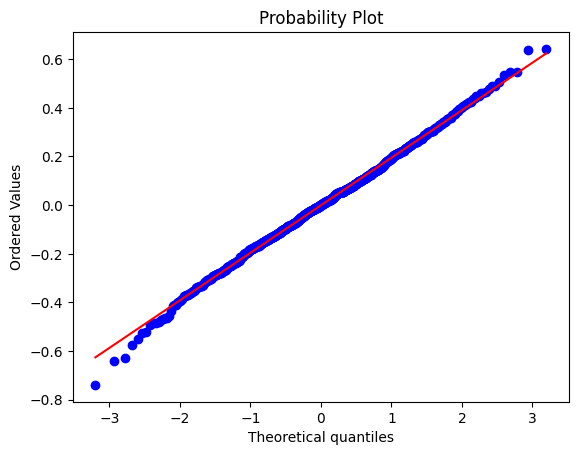

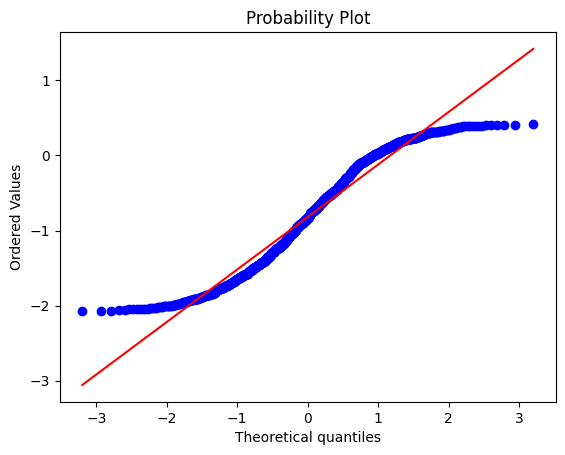

In [31]:
q = stats.probplot(model_err.T[0], dist="norm", plot=plt)
plt.show()
stats.probplot(ksg_err.T[0], dist="norm", plot=plt)
plt.show()

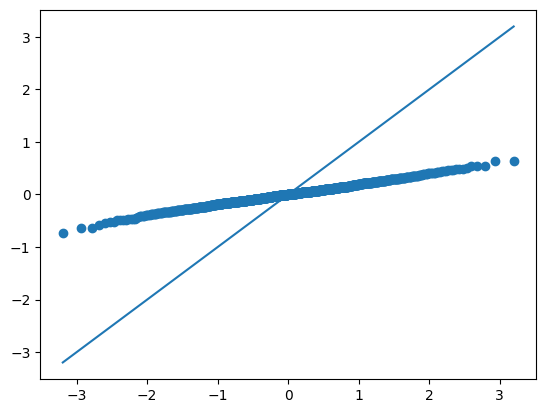

In [70]:
plt.scatter(q[0][0], q[0][1])
x = np.linspace(np.min(q[0][0]), np.max(q[0][0]), 1000)
y = np.linspace(np.min(q[0][1]), np.max(q[0][1]), 1000)
#q[1]
plt.plot(q[0][0], q[0][0])
plt.show()

0.9978802507425114


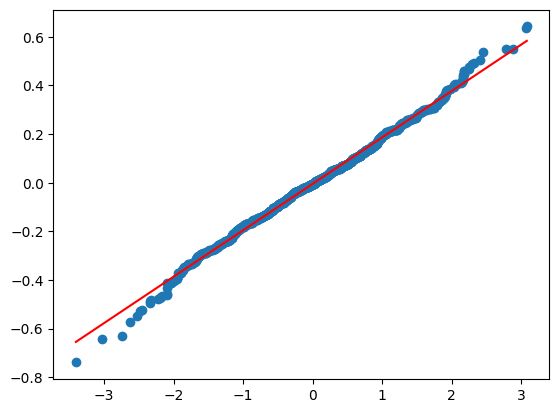

In [97]:
def qq_plot(data, sample_size):
    """
    https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

    Args:
        data (_type_): _description_
        sample_size (_type_): _description_

    Returns:
        _type_: _description_
    """
    qq = np.ones([sample_size, 2])
    np.random.shuffle(data)
    qq[:, 0] = np.sort(data[0:sample_size])
    qq[:, 1] = np.sort(np.random.normal(size = sample_size))
    return qq


def regression(x, y):
    xmean = np.mean(x)
    ymean = np.mean(y)

    ssxm, ssxym, _, ssym = np.cov(x, y, bias=1).flat
    slope = ssxym / ssxm
    intercept = ymean - slope*xmean

    # R value
    if ssxm == 0.0 or ssym == 0.0:
        # If the denominator was going to be 0
        r = 0.0
    else:
        r = ssxym / np.sqrt(ssxm * ssym)
        # Test for numerical error propagation (make sure -1 < r < 1)
        if r > 1.0:
            r = 1.0
        elif r < -1.0:
            r = -1.0
    print(r)
    return slope, intercept

#print(qq_plot(model_err.T[0], 1000))
qq = qq_plot(model_err.T[0], len(model_err.T[0]))
slope, intercept = regression(qq[:,1], qq[:,0])

plt.scatter(qq[:,1], qq[:,0])

plt.plot(qq[:,1], slope*qq[:,1]+intercept, color='r')
plt.show()

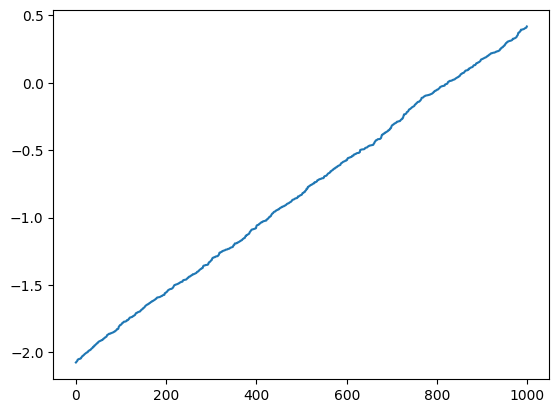

In [92]:
plt.plot(qq[:,0])

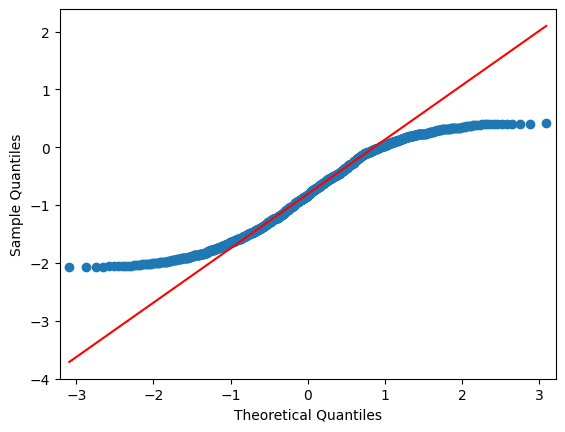

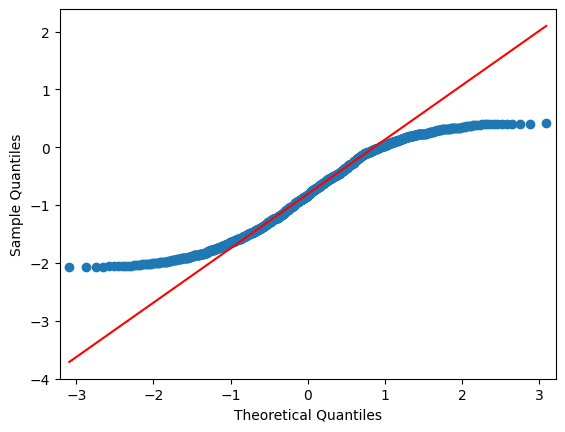

In [19]:
from statsmodels.api import qqplot
#qqplot(model_err[:, 0], line='q')
qqplot(ksg_err[:, 0], line='q')

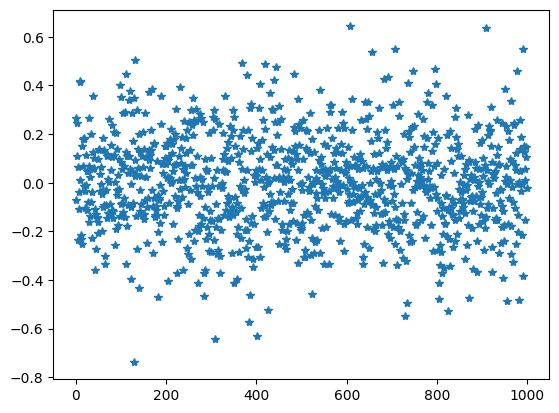

In [12]:
plt.plot(model_err, '*')